(1) 生成兩組在區間上滿足均勻分佈(uniform distribution)的隨機數[0,1]，並為每組創建 10,000 個均勻隨機數。均勻隨機數可以從某個數到另一個數之一致概率生成的隨機函數np.random.uniform來產生。例如，np.random.uniform(0.0, 1.0, 10)可以生成 0 到 1 範圍內的 10 個均勻隨機數值。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x_min, x_max = 0.0, 1.0
np.random.uniform(x_min, x_max, 10000)

array([0.17397138, 0.86129464, 0.504356  , ..., 0.40486283, 0.0094887 ,
       0.42458965])

（2）在𝑥 – 𝑦平面上，假設平面中心為(0,0), 考慮一個半徑為 1 的圓和一個邊長為 2的正方形。此時圓的面積為𝜋圓周率而正方形的面積是4。計算方式是檢討有多少(x,y)配對點在這個產生的10,000 個隨機數中的組合中會有多少個點在圓圈內？在這裡, 一個配對點(x,y)進入一個圓圈的內部表示坐標原點與配對點（𝑥 ，𝑦 ）之向量長度是否小於或等於1的情況為判據。計算之長度以歐幾里得範數計算(就是三角形之斜邊長)。在 Python 中，math.hypot(x,y)您可以使用計算。

In [2]:
import math
m = 10000
n = 0
x = np.random.uniform(0.0,1.0,10000)
y = np.random.uniform(0.0,1.0,10000)
for i in range(10000):
    if math.hypot(x[i],y[i]) <= 1:
        n += 1

(3)半徑為1的圓的面積與長度為2的正方形面積之比為𝜋:4, 或是圓周率/4:1所以，讓我們使用這個和之前的結果來找到 pi。

In [4]:
pi = 4 * n / m
print("pi = {}".format(pi))

pi = 3.138


In [8]:
np.random.randn(0,10,1000)

array([], shape=(0, 10, 1000), dtype=float64)

(4)如果產生之亂數以不同機率分配產生, 其結果會不同嗎? (例如使用標準常態或是其他分配?)

In [26]:
m = 10000
n = 0
x = np.random.rand(10000) # 產生0~1
y = np.random.rand(10000)
for i in range(10000):
    if math.hypot(x[i],y[i]) <= 1:   #回傳兩個參數平方和的平方根，也就是直角三角形的斜邊長。
        n += 1
        
pi = 4 * n / m
print("pi = {}".format(pi))

pi = 3.1196


In [25]:
m = 10000
n = 0
x = np.random.randint(1, size=10000) # <1的整數，全是0
y = np.random.randint(1, size=10000)
for i in range(10000):
    if math.hypot(x[i],y[i]) <= 1:   #回傳兩個參數平方和的平方根，也就是直角三角形的斜邊長。
        n += 1
        
pi = 4 * n / m
print("pi = {}".format(pi))

pi = 4.0


In [29]:
m = 10000
n = 0
for i in range(10000):  # 任意數
    if math.hypot(np.random.randn(),np.random.randn()) <= 1:   #回傳兩個參數平方和的平方根，也就是直角三角形的斜邊長。
        n += 1
        
pi = 4 * n / m
print("pi = {}".format(pi))

pi = 1.5636


(5) 計算之結果是用繪圖方式繪出趨勢. 

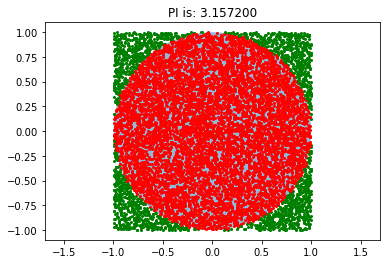

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

points = 10000
# 圆的信息
r = 1.0         # 半径
a, b = (0., 0.) # 圆心
 
# 正方形區域
x_min, x_max = a-r, a+r
y_min, y_max = b-r, b+r
in_circle = 0
x = np.random.uniform(x_min,x_max,points)
y = np.random.uniform(y_min,y_max,points)

d = np.sqrt((x)**2 + (y)**2)

total = np.where(d<=1.0,1,0)
in_circle = np.sum(total)
pi = 4 * in_circle / points
fig = plt.figure()                  # 設定圖的屬性
axes = fig.add_subplot(111)         # 新增子圖
axes.set_title('PI is: %f'  %pi)    # 標題
for i in range(len(total)):
    if total[i] == 1:
        axes.plot(x[i], y[i],'ro',markersize = 2)  # 圓內顏色
    else:
        axes.plot(x[i], y[i],'go',markersize = 2)  # 圓外顏色
        
plt.axis('equal') # 防止圖像變形，等比例加上圖形
 
circle = Circle(xy=(a,b), radius=r, alpha=0.5)   #(x, y)是圓心，radius是半徑
axes.add_patch(circle)          #畫圖形至新增到軸上
 
plt.show()

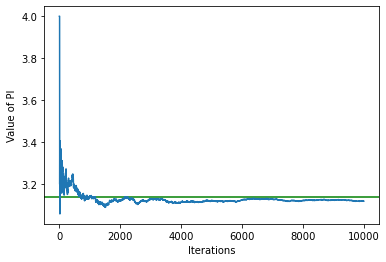

In [10]:
points = 10000
in_circle = 0
out_circle = 0
pi = 0
pi_values = []
dis = 0
avg_pi_errors = 0
for i in range(points):
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,1)
    dis = np.square(pow(x,2) + pow(y,2))
    if dis <= 1.0:
        in_circle += 1
    else:
        out_circle += 1
        
    pi = 4*in_circle/(in_circle+out_circle)
    pi_values.append(pi)

# Plot the PI values   
plt.axhline(y=math.pi, color='g', linestyle='-')
plt.plot(pi_values)
plt.xlabel("Iterations")
plt.ylabel("Value of PI")
plt.show()